# Supervised Learning

## Do the following in the iris dataset.

1. Read the dataset to the python environment.


2. Do necessary pre-processing steps.


3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


### Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment 

In [64]:
data=pd.read_excel('iris.xls')

In [65]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Do necessary pre - processing steps

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking for missing values

In [68]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [69]:
data.shape

(150, 5)

In [70]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [71]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Filling the missing values in the dataset

Plotting Frequency

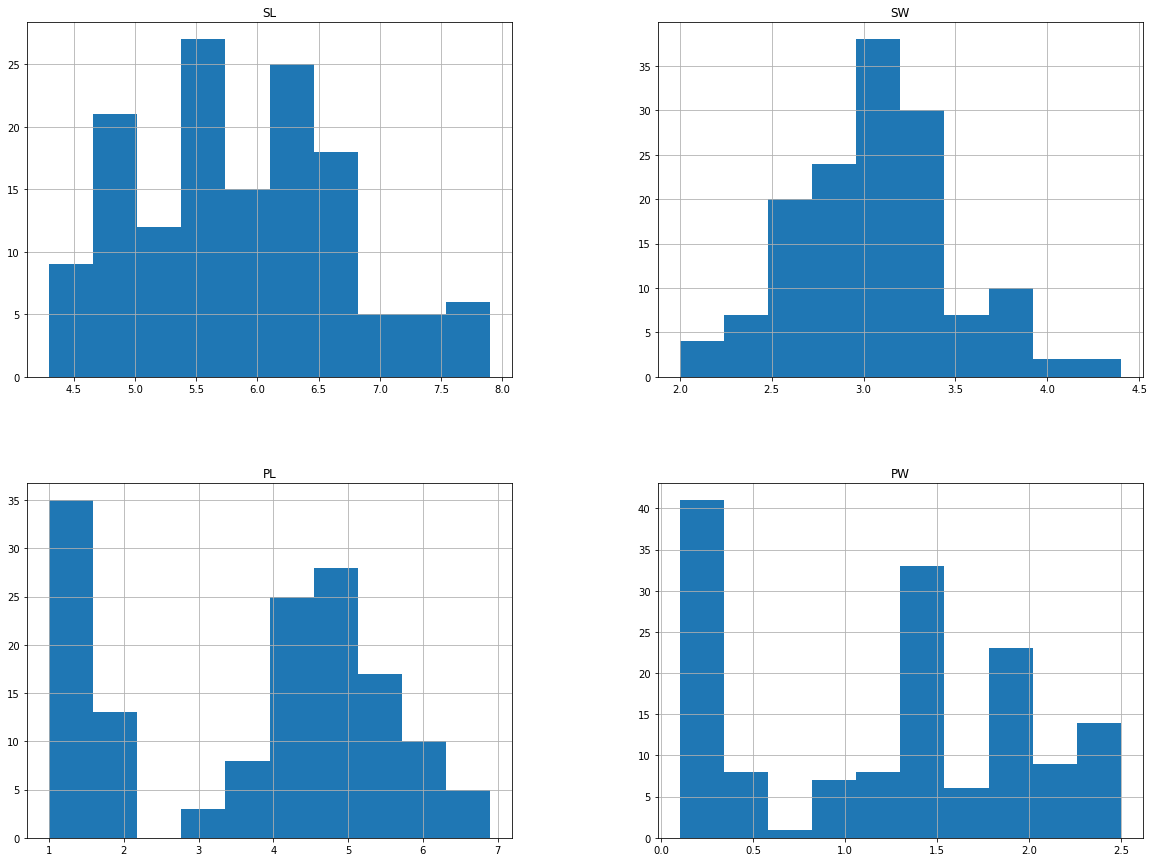

In [72]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [73]:
for i in ['SL']:
    data[i]=data[i].fillna(data[i].median())

In [74]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [75]:
for i in ['SW']:
    data[i]=data[i].fillna(data[i].median())

In [76]:
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [77]:
for i in ['PL']:
    data[i]=data[i].fillna(data[i].median())

In [78]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the missing values are filled now

Handling Outliers

Text(0.5, 1.0, 'Box plot of Sepal Length')

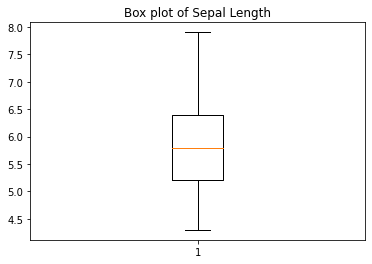

In [79]:
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')

* No outliers

Text(0.5, 1.0, 'Box plot of Sepal Width')

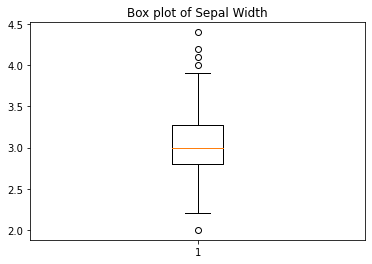

In [80]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

In [81]:
Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation = 'midpoint')

In [82]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [83]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [84]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [85]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [86]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [87]:
data.drop([14, 15, 32, 33], inplace=True)

Text(0.5, 1.0, 'Box plot of Sepal Width')

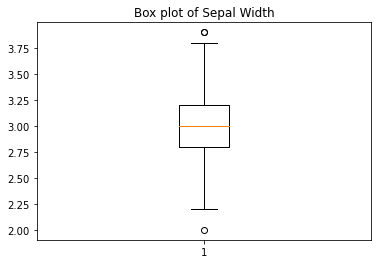

In [88]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

Text(0.5, 1.0, 'Box plot of Petal Length')

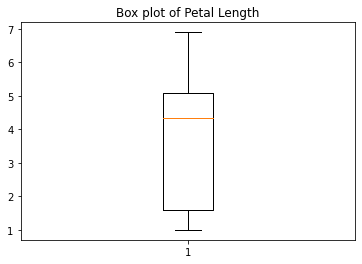

In [89]:
plt.boxplot(data['PL'])
plt.title('Box plot of Petal Length')

* No outliers

Text(0.5, 1.0, 'Box plot of Petal Width')

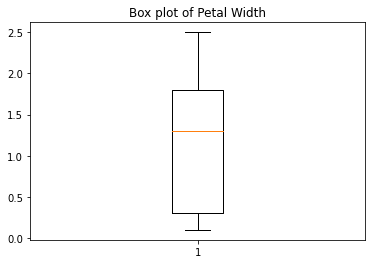

In [90]:
plt.boxplot(data['PW'])
plt.title('Box plot of Petal Width')

* No outliers

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

(1) Logistic Regression 

In [102]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [104]:
x_train.shape

(116, 4)

In [108]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(x_train,y_train)
y_pred = logre.predict(x_test)

C:\Users\ABRAAM ASHLY SANAL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [112]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9333333333333333


In [113]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

(2) KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [116]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

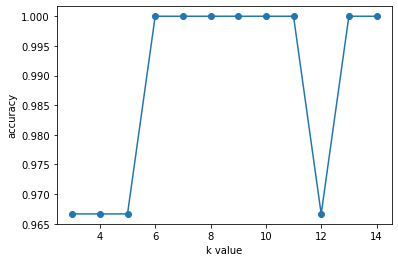

In [117]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [118]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [122]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [121]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

(3) Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [125]:
y_pred = dt_model.predict(x_test)

In [129]:
print('Accuracy on Decision Tree Model is', accuracy_score(y_test,y_pred))

Accuracy on Decision Tree Model is 0.9333333333333333


In [130]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

(4) SVM
  
    a. Linear SVM
    
    b. Polynomial SVM
    
    c. Radial SVM

a. Linear SVM

In [132]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [133]:
y_pred = svm_linear.predict(x_test)

In [134]:
print('Accuracy using linear SVM is', accuracy_score(y_test,y_pred))

Accuracy using linear SVM is 0.9666666666666667


In [135]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9333333333333333


b. Polynomial SVM

In [136]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [137]:
y_pred = svm_poly.predict(x_test)
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9333333333333333


c. Radial SVM

In [138]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)

SVC()

In [139]:
y_pred = svm_radial.predict(x_test)
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9333333333333333


5. Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [143]:
y_pred = classifier.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9666666666666667


In [142]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


Accuracy:
    
    * Logistic Regression - 0.9333333333333333
    
    * KNN - 0.9666666666666667
    
    * Decision Tree - 0.9333333333333333
    
    * SVM : 
        
        Linear - 0.9333333333333333
        
        Polynomial - 0.9333333333333333
        
        Radial - 0.9333333333333333
    
    * Random Forest - 0.9666666666666667

#### Insight:  KNN and Random Forest classification model gives the best result to predict iris species, which has an accuracy of  0.9666666666666667